In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


In [8]:
with open("./Dummy Datasets X Variable v3.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

Gender;Usia;Pinjaman;Tenor;Pemasukan;Tanggungan;Pekerjaan;Donasi

Each data point looks like this:

M;53;1800000;6;1500000;1;Buruh;0



In [9]:
df  = pd.read_csv(r'./Dummy Datasets X Variable v3.csv', delimiter=';')
print(df.head())

  Gender  Usia  Pinjaman  Tenor  Pemasukan  Tanggungan      Pekerjaan  Donasi
0      M    53   1800000      6    1500000           1          Buruh       0
1      M    61    500000      4    3500000           0     Guru/Dosen       3
2      M    33   1000000      6    1200000           0       Pedagang       6
3      M    37   1200000     16    1800000           5  Pekerja Lepas       5
4      F    36   1200000     10    4600000           1          Buruh       4


In [10]:
# converting to list
gender_list = df["Gender"].tolist()
usia_list = df["Usia"].tolist()
pinjaman_list = df["Pinjaman"].tolist()
tenor_list = df["Tenor"].tolist()
pemasukan_list = df["Pemasukan"].tolist()
tanggungan_list = df["Tanggungan"].tolist()
pekerjaan_list = df["Pekerjaan"].tolist()
donasi_list = df["Donasi"].tolist()

In [11]:
approval = []
i = 0

for i in range(0,10000):
    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 2000000:
        if usia_list[i] <= 63:
            if pekerjaan_list[i] == 'Buruh' or pekerjaan_list[i] == 'Guru/Dosen':
                if gender_list[i] == 'F':
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 1500000*(tanggungan_list[i]+1):
                        approval.append('Y')
                    else:
                        if donasi_list[i] >= 6:
                            approval.append('Y')
                        else:
                            approval.append('N')
                else:
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 1500000*(tanggungan_list[i]+2):
                        approval.append('Y')
                    else:
                        if donasi_list[i] >= 6:
                            approval.append('Y')
                        else:
                            approval.append('N')
            else:
                if gender_list[i] == 'F':
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 150000*(tanggungan_list[i]+1):
                         approval.append('Y')
                    else:
                        if donasi_list[i] >= 6:
                            approval.append('Y')
                        else:
                            approval.append('N')
                else:
                    if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 120000*(tanggungan_list[i]+2):
                        approval.append('Y')
                    else:
                        if donasi_list[i] >= 6:
                            approval.append('Y')
                        else:
                            approval.append('N')
        else:
            if pekerjaan_list[i] == 'Pedagang' or pekerjaan_list[i] == 'Pekerja Lepas' or pekerjaan_list[i] == 'Wirausaha':
                if pemasukan_list[i] >= pinjaman_list[i]/(pinjaman_list[i]/4) + 120000*(tanggungan_list[i]+2):
                    approval.append('Y')
                else:
                    if donasi_list[i] >= 6:
                        approval.append('Y')
                    else:
                        approval.append('N')
            else:
                approval.append('N')
    else:
        approval.append('N')

print(len(approval))   




10000


In [12]:
# to remove duplicated from list labels
result = [] 
[result.append(x) for x in approval if x not in result] 

# printing list labels after removal 
print ("The list after removing duplicates: " + str(result)) 

# count number of each label in the data
res = {}

for i in approval:
    res[i] = approval.count(i)
    
print(f"the number of each label in the data:\n {res}")

The list after removing duplicates: ['N', 'Y']
the number of each label in the data:
 {'N': 4733, 'Y': 5267}


In [13]:
data = pd.DataFrame(np.column_stack([approval, 
                                    gender_list,
                                    usia_list,
                                    pinjaman_list,
                                    tenor_list,
                                    pemasukan_list,
                                    tanggungan_list,
                                    pekerjaan_list,
                                    donasi_list
                                    ]), 
                               columns=['approval', 'gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan', 'donasi'])

data.head()

,approval,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,N,M,53,1800000,6,1500000,1,Buruh,0
1,Y,M,61,500000,4,3500000,0,Guru/Dosen,3
2,N,M,33,1000000,6,1200000,0,Pedagang,6
3,N,M,37,1200000,16,1800000,5,Pekerja Lepas,5
4,Y,F,36,1200000,10,4600000,1,Buruh,4


In [14]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(data[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        data.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [15]:
categorical_features = ['approval', 'gender','pekerjaan']
Cat_to_Num(categorical_features)

approval --> {'N': 0, 'Y': 1}
gender --> {'F': 0, 'M': 1}
pekerjaan --> {'Buruh': 0, 'Guru/Dosen': 1, 'Pedagang': 2, 'Pekerja Lepas': 3, 'Wirausaha': 4}


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   approval    10000 non-null  int64 
 1   gender      10000 non-null  int64 
 2   usia        10000 non-null  object
 3   pinjaman    10000 non-null  object
 4   tenor       10000 non-null  object
 5   pemasukan   10000 non-null  object
 6   tanggungan  10000 non-null  object
 7   pekerjaan   10000 non-null  int64 
 8   donasi      10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.2+ KB


In [17]:
labels = data['approval']
features = data.drop('approval', axis=1)

In [18]:
col_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan', 'donasi']

features[col_features] = features[col_features].astype('int64')

In [19]:
for col in col_features:
    print(f'max value of {col}: {max(features[col])}')
    print(f'min value of {col}: {min(features[col])}')

max value of gender: 1
min value of gender: 0
max value of usia: 100
min value of usia: 20
max value of pinjaman: 3000000
min value of pinjaman: 500000
max value of tenor: 20
min value of tenor: 3
max value of pemasukan: 5000000
min value of pemasukan: 1200000
max value of tanggungan: 5
min value of tanggungan: 0
max value of pekerjaan: 4
min value of pekerjaan: 0
max value of donasi: 8
min value of donasi: 0


In [20]:
features.head(5)

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,1,53,1800000,6,1500000,1,0,0
1,1,61,500000,4,3500000,0,1,3
2,1,33,1000000,6,1200000,0,2,6
3,1,37,1200000,16,1800000,5,3,5
4,0,36,1200000,10,4600000,1,0,4


### -- Normalize Data

In [21]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [22]:
col_features = ['gender', 'usia', 'pinjaman', 'tenor', 'pemasukan', 
                'tanggungan', 'pekerjaan', 'donasi']

features[col_features] = mx.fit_transform(features[col_features])
features.head(5)

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,1.0,0.4125,0.52,0.176471,0.078947,0.2,0.00,0.000
1,1.0,0.5125,0.00,0.058824,0.605263,0.0,0.25,0.375
2,1.0,0.1625,0.20,0.176471,0.000000,0.0,0.50,0.750
3,1.0,0.2125,0.28,0.764706,0.157895,1.0,0.75,0.625
4,0.0,0.2000,0.28,0.411765,0.894737,0.2,0.00,0.500


In [23]:
# scale= StandardScaler()
# features = scale.fit_transform(features) 
# print(features)

In [24]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, labels, test_size=0.3, shuffle=True, stratify=labels, random_state=42)

# % of training set
len(X_train)/len(features)

0.7

In [25]:
X_train.head()

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
2345,1.0,0.7250,0.56,0.411765,0.210526,0.0,0.50,0.250
9346,1.0,0.9000,0.36,0.529412,0.078947,0.4,0.25,0.375
138,0.0,0.9250,0.08,0.176471,0.000000,1.0,0.50,0.125
1967,0.0,0.7375,0.36,0.294118,0.000000,0.4,0.25,0.625
4148,0.0,0.8125,0.40,0.411765,0.342105,0.4,0.25,0.125


In [26]:
X_train = np.array(X_train, dtype='float32')
X_validate = np.array(X_validate, dtype='float32')

y_train = np.array(y_train, dtype='float32')
y_validate = np.array(y_validate, dtype='float32')

In [27]:
X_train

array([[1.   , 0.725, 0.56 , ..., 0.   , 0.5  , 0.25 ],
       [1.   , 0.9  , 0.36 , ..., 0.4  , 0.25 , 0.375],
       [0.   , 0.925, 0.08 , ..., 1.   , 0.5  , 0.125],
       ...,
       [0.   , 0.175, 0.28 , ..., 0.6  , 0.5  , 0.25 ],
       [1.   , 0.35 , 0.28 , ..., 1.   , 0.5  , 0.125],
       [1.   , 0.875, 0.4  , ..., 0.2  , 0.5  , 0.125]], dtype=float32)

In [28]:
X_train.shape, X_validate.shape

((7000, 8), (3000, 8))

In [29]:
y_train.shape, y_validate.shape

((7000,), (3000,))

## Create TF Model

In [30]:
def create_model():
    
    model = tf.keras.Sequential([
        # tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu", input_shape=X_train[0].shape),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                  metrics=['accuracy'])


    return model

In [31]:
mc = ModelCheckpoint('creditapproval_model_v3_02.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [32]:
model = create_model()

history = model.fit(X_train, y_train, 
                    epochs=300, 
                    batch_size = 32,
                    callbacks = [mc],
                    validation_data=(X_validate, y_validate))

Epoch 1/300
211/219 [===========================>..] - ETA: 0s - loss: 0.6485 - accuracy: 0.6260
Epoch 1: val_accuracy improved from -inf to 0.66167, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 6s 5ms/step - loss: 0.6479 - accuracy: 0.6266 - val_loss: 0.6284 - val_accuracy: 0.6617
Epoch 2/300
213/219 [============================>.] - ETA: 0s - loss: 0.6125 - accuracy: 0.6819
Epoch 2: val_accuracy improved from 0.66167 to 0.70767, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 1s 4ms/step - loss: 0.6117 - accuracy: 0.6823 - val_loss: 0.5912 - val_accuracy: 0.7077
Epoch 3/300
205/219 [===========================>..] - ETA: 0s - loss: 0.5777 - accuracy: 0.7261
Epoch 3: val_accuracy improved from 0.70767 to 0.75067, saving model to creditapproval_model_v3_02.h5
219/219 [==============================] - 1s 4ms/step - loss: 0.5769 - accuracy: 0.7260 - val_loss: 0.5613 - val_accuracy: 0.7507
Epoch 4/300
2

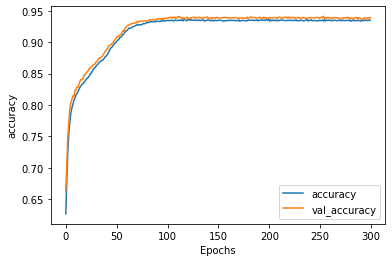

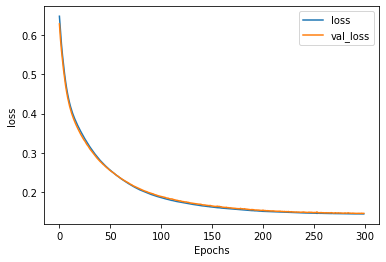

In [33]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
scores = []
score = model.evaluate(X_validate, y_validate, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

print(cm)
print(classification_report(y_validate, y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))


94/94 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.9393
[[1331   89]
 [  93 1487]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1420
         1.0       0.94      0.94      0.94      1580

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

0.9393333196640015


In [216]:
# model.save('creditapproval_model_v2_03s-best.h5')

## Predict Output

In [15]:
features.head(5)

,gender,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,donasi
0,1,53,1800000,6,1500000,1,0,0
1,1,61,500000,4,3500000,0,1,3
2,1,33,1000000,6,1200000,0,2,6
3,1,37,1200000,16,1800000,5,3,5
4,0,36,1200000,10,4600000,1,0,4


In [30]:
final_model = tf.keras.models.load_model('./creditapproval_model_v3_02.h5')

In [31]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [32]:
predictions = final_model.predict(features)

313/313 [==============================] - 3s 1ms/step


In [24]:
np.round(predictions[0])

array([0.], dtype=float32)

In [ ]:
# y = y_validate.to_list()
print(y_validate[1])
print(predictions[1])

0.0
[0.01235405]


In [ ]:
predictions = final_model.predict(features)

In [ ]:
print(data[10:11])
print(features[10:11])
print(predictions[10])
print(np.round(predictions[10]))
print(labels[10])

    approval  gender usia pinjaman tenor pemasukan tanggungan  pekerjaan  \
10         1       1   31  1000000    16   5000000          5          2   

   donasi  
10      5  
    gender    usia  pinjaman     tenor  pemasukan  tanggungan  pekerjaan  \
10     1.0  0.1375       0.2  0.764706        1.0         1.0        0.5   

    donasi  
10   0.625  
[0.98215264]
[1.]
1


In [ ]:
scores = []
score = final_model.evaluate(X_validate, y_validate, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = final_model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

print(cm)
print(classification_report(y_validate,y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))


94/94 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9413
[[1346   74]
 [ 102 1478]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      1420
         1.0       0.95      0.94      0.94      1580

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

0.9413333535194397


94/94 [==============================] - 0s 1ms/step


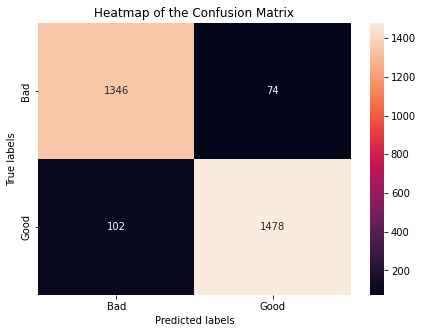

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt     

y_pred = final_model.predict(X_validate)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_validate, y_pred)

target_names = ['Bad', 'Good']

fig,ax=plt.subplots(1,1,
                    figsize=(7,5)
                   )

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Heatmap of the Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

In [6]:
# data
gender = 1
usia = 31
pinjaman = 1000000
tenor = 16
pemasukan = 5000000
tanggungan = 5
pekerjaan = 2
donasi = 5

data = [gender, (usia-20) / 80, (pinjaman - 500000) / 2500000, (tenor - 3) / 17, (pemasukan - 1200000) / 3800000,
        (tanggungan / 5), (pekerjaan / 4), (donasi / 8)]


inputs = np.array(data, dtype='float32')
inputs = np.expand_dims(inputs, 0)
print(inputs)
print(tf.constant(inputs))

[[1.        0.1375    0.2       0.7647059 1.        1.        0.5
  0.625    ]]
tf.Tensor(
[[1.        0.1375    0.2       0.7647059 1.        1.        0.5
  0.625    ]], shape=(1, 8), dtype=float32)


In [11]:
predictions = final_model(inputs)
predictions

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.98215264]], dtype=float32)>

In [72]:
def predict(x):
    predictions = final_model(x)
    predictions = tf.nn.softmax(predictions)
    pred0 = predictions[0]
    label0 = np.round(pred0)
    return label0

In [73]:
prediction = predict(inputs)

In [75]:
prediction[0]

1.0

## Convert Model .h5 to TFLite

In [42]:
final_model = tf.keras.models.load_model('./creditapproval_model_v3_02.h5')

# Check its architecture
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.models import load_model
saved_model = load_model('creditapproval_model_v3_02.h5')
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = saved_model.evaluate(X_validate, y_validate, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.938, Valid: 0.941


In [44]:
import tempfile
import os

MODEL_DIR = './exp_creditapproval_model_v3_02'

# version = 2

# export_path = os.path.join(MODEL_DIR, str(version))
export_path = os.path.join(MODEL_DIR)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: ./exp_creditapproval_model_v3_02\assets

export_path = ./exp_creditapproval_model_v3_02


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [45]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'creditapproval_model_v3_02.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

label_types = ['Bad Credit', 'Good Credit']
with open('creditapproval_model_v3_02.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [1]:
# import tensorflow as tf
# model_path = "./creditapproval_model_v2_04/exp_creditapproval_model_v2_04"
# model = tf.saved_model.load(model_path)

## Load TFLite model

Load TensorFlow lite model with interpreter interface.

In [46]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="creditapproval_model_v3_02.tflite")
# interpreter = tf.lite.Interpreter(model_path="regression.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_dense_input:0',
  'index': 0,
  'shape': array([1, 8]),
  'shape_signature': array([-1,  8]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [47]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 7,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [48]:
X_validate[1]

array([1.        , 0.3       , 0.2       , 0.4117647 , 0.21052632,
       1.        , 0.5       , 0.        ], dtype=float32)

In [66]:
np_res_im = np.array(X_validate[0])
np_res_im = (np_res_im).astype('float32')
np_res_im

array([0.        , 0.3375    , 0.4       , 0.29411766, 0.8684211 ,
       0.6       , 1.        , 0.375     ], dtype=float32)

In [67]:
print(input_details[0]['shape'])
print(np_res_im.shape)

[1 8]
(8,)


In [69]:
if len(np_res_im.shape) == 1:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [70]:
print(np_res_im.shape)

(1, 8)


In [60]:
output_data.shape

(1, 1)

In [31]:
# print(X_validate[0])
# print(labels[0])
# print(predictions[0])
# print(output_data)

In [65]:
print(X_validate[1])
print('actual labels: ' + str(y_validate[0]))
print('prediction from model.h5: ' + str(predictions[0]))
print('prediction from model.tflite: ' + str(output_data))

[1.         0.3        0.2        0.4117647  0.21052632 1.
 0.5        0.        ]
actual labels: 1.0
prediction from model.h5: [0.99994016]
prediction from model.tflite: [[0.99995583]]


In [67]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[1], separator=', '), '\n]}')
print('Expected Result:', predictions[1])
print('Actual Labels:', y_validate[1])

Test Data:

{"instances": [
 [1.        , 0.3       , 0.2       , 0.4117647 , 0.21052632, 1.        ,
 0.5       , 0.        ] 
]}
Expected Result: [0.02633226]
Actual Labels: 0.0


In [66]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[2], separator=', '), '\n]}')
print('Expected Result:', predictions[2])
print('Actual Labels:', y_validate[2])

Test Data:

{"instances": [
 [0.       , 0.2      , 0.       , 0.5294118, 0.8684211, 0.4      ,
 1.       , 0.       ] 
]}
Expected Result: [0.9999976]
Actual Labels: 1.0


In [ ]:
{"instances": [
 [0., 0.94, 0.6, 0.4117647 , 0.34210527, 0.,
 0.] 
]}

In [34]:
import joblib
import tensorflow as tf

# final_model = tf.keras.models.load_model('./creditapproval_model_v2_04.h5')
joblib.dump(model, open('creditapproval_model_v2_04s.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://a0a4efde-f473-49e9-9edc-ddb1cc945908/assets


In [35]:
import joblib
import numpy as np
print(joblib.__version__)

model = joblib.load(open("creditapproval_model_v2_04s.pkl", 'rb'))
print(model(np.random.random((1,7))))

1.1.0


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://ad8ba69f-512d-48bd-bfb8-5bedc7b4424c/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [36]:
tf.keras.experimental.export_saved_model(model, './')

AttributeError: module 'keras.api._v2.keras.experimental' has no attribute 'export_saved_model'